<h1 align='center'> Linear Regression </h1>

In [27]:
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install pandas 
!pip3 install numpy

<h3> 0. Importing Dependencies </h3>
<p> We import dependencies here. The dependencies needed for this notebook are </p>
<ol>
    <li> pandas </li>
    <li> matplotlib </li>
    <li> numpy </li>
</ol>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


<h3> 1. Reading Data </h3>
<p> Initially we read the data, put it on csv file. So we can use it to train the linear regression model </p>

In [29]:
# names=[]
# hours=[]
# scores=[]
# data_frame_dict={}
# for i in range(30):
#     data_frame_dict['Names']=names.append(input(f'Enter {i} name'))
#     data_frame_dict['Hours']=hours.append(input(f'Enter hours for {i}tn student'))
#     data_frame_dict['Scores']=scores.append(input(f'Enter Scores for {i}tn student'))

# data_frame=pd.DataFrame(data_frame_dict)
# data_frame.to_csv('student_scores.csv',index=False)

In [30]:
#Create data frame and save as csv here, then read from the csv file as shown below

data_student=pd.read_csv('Data/student_scores.csv')
display(data_student.head(6))

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


<h3> 2. Visualizing Data </h3>

<p> From our previous session we learned that whenever we have small dimension data 2d-3d data. Rule of thumb is that we should visualize the data to see the underlying pattern on it. </p>

Text(0, 0.5, 'grades')

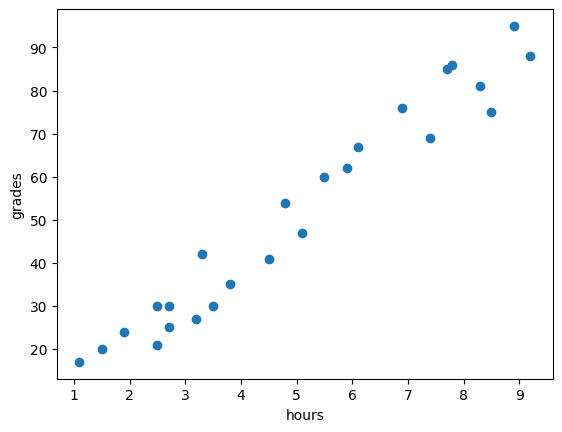

In [31]:
X=np.array(data_student['Hours'])
Y=np.array(data_student['Scores'])

plt.scatter(X,Y)
plt.xlabel('hours')
plt.ylabel('grades')

<h3>3. Understanding Linear Regression </h3>

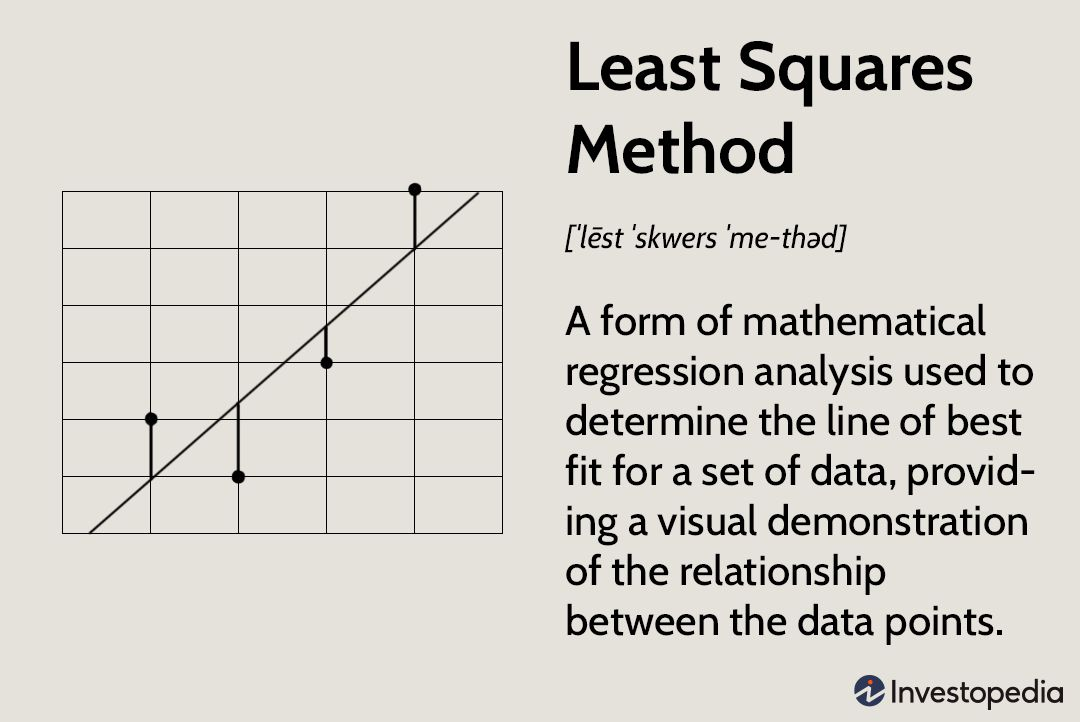
<br>
<p> We use the formula as: </p>

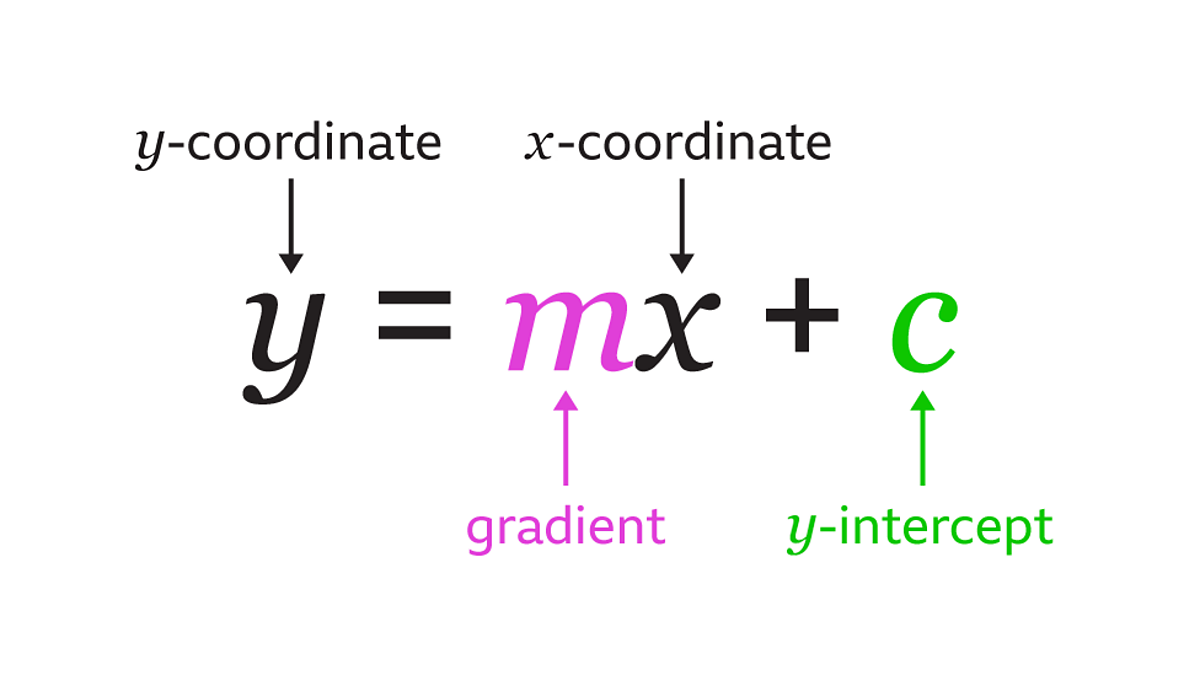

<p> The idea is that we basically create the best fit line from the existing pattern in thedataset. <br> Then we use this best fit line to predict about unseen data so we can bascally capture the trend.</p> <br>

<b> Using Least Squared Method: </b>
<p> we can compute <b> m </b> and <b> c </b> using least square method as:

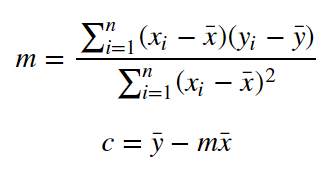

In [32]:
def compute_m_c(X,Y):
    n=len(X)
    X_mean=sum(X)/len(X)
    Y_mean=sum(Y)/len(Y)
    num=0
    den=0
    for i in range(len(X)):
        num+=(X[i]-X_mean)*(Y[i]-Y_mean)
        den+=(X[i]-X_mean)**2
    m=num/den
    c=Y_mean-m*X_mean
    return m,c

slope,intercept=compute_m_c(X,Y)
print(f'slope (m): {slope},\nintercept (c): {intercept}')


slope (m): 9.775803390787475,
intercept (c): 2.4836734053731746


<h3> 4. Visualize Best Fit Line </h3>

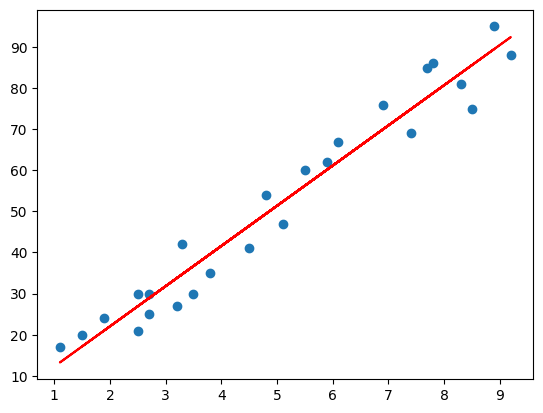

In [33]:
Y_pred=[slope*i+intercept for i in X]
plt.scatter(X,Y)
plt.plot(X,np.array(Y_pred),color='red')

<h3> 5. R Squared Method </h3>

<p> R squared value is computed to get how well the best fit line justifies the data </p>

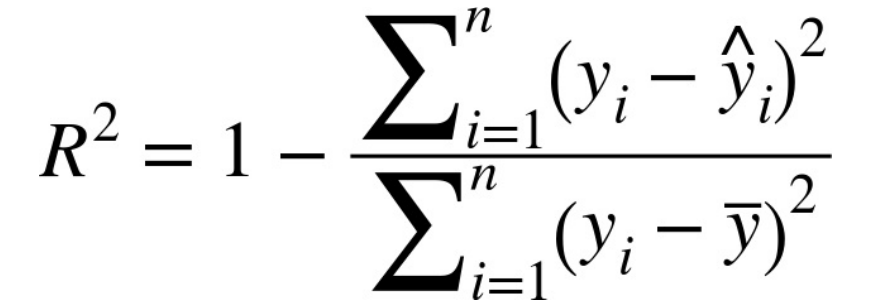

<p> 1- total sum of errors is what it represents </p>

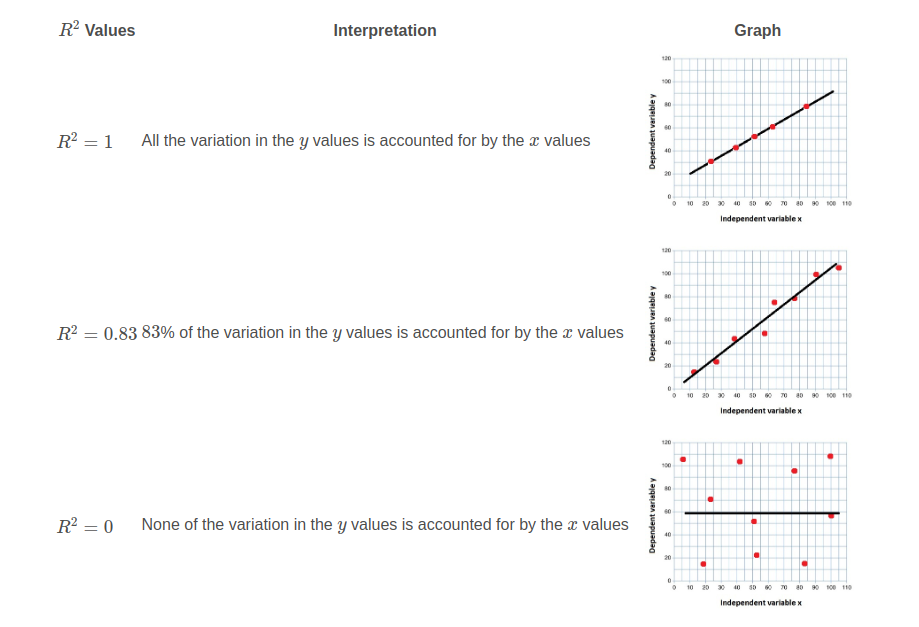

In [34]:

def compute_R_squared(m,c,X,Y):
    Y_mean=sum(Y)/len(Y)
    num=0
    den=0
    for i in range(len(X)):
        #YOUR CODE HERE 
        pass # remove this while coding 
        ##################

    R_squared='Change this too. '
    return R_squared

print(compute_R_squared(slope,intercept,X,Y))

Change this too. 


<h3> 6. Checking Model on unseen data </h3>
Let's try a completely unseen data point, For following cases 

3 hours study gets how much marks ?

In [35]:
hours_test=3
predicted_score= 'Calculate the score here'

#plt.scatter(X,Y)
#plt.plot(X,slope*X+intercept,color='red')

# Plot the new unseen data and where it lies: 
# YOUR CODE HERE

##########################

<h3> Using Gradient Descent </h3>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def predict(X, m, c):
    """
    Hypothesis function that predicts the output based on the input features X,
    and the parameters m (slope) and c (intercept).
    """
    return [m * x + c for x in X]

def compute_mse(X, y, m, c):
    """
    Compute the Mean Squared Error (MSE) between the predicted values and actual values.
    MSE is the average of the squared differences between predicted and actual values.
    """
    predictions = predict(X, m, c)
    error = sum((p - y_i) ** 2 for p, y_i in zip(predictions, y))
    return error / len(y)

def numerical_gradient(X, y, m, c, h=1e-5):
    """
    Compute the numerical gradients for the Mean Squared Error (MSE) with respect to
    the parameters m and c using the first principles of derivatives.
    The gradient is approximated by perturbing the parameters slightly and calculating
    the difference in the cost function.
    """
    initial_cost = compute_mse(X, y, m, c)
    
    # Perturb m slightly to compute the gradient w.r.t. m
    m_perturbed = m + h
    cost_m_perturbed = compute_mse(X, y, m_perturbed, c)
    dm = (cost_m_perturbed - initial_cost) / h
    
    # Perturb c slightly to compute the gradient w.r.t. c
    c_perturbed = c + h
    cost_c_perturbed = compute_mse(X, y, m, c_perturbed)
    dc = (cost_c_perturbed - initial_cost) / h
    
    return dm, dc

def gradient_descent(X, y, m, c, learning_rate, epochs):
    """
    Perform gradient descent optimization to minimize the Mean Squared Error (MSE).
    The function updates the parameters m and c iteratively using the computed numerical gradients.
    """
    errors = []
    for epoch in range(epochs):
        for i in range(len(X)):
            dm, dc = numerical_gradient(X, y, m, c)
            m -= learning_rate * dm
            c -= learning_rate * dc
        cost = compute_mse(X, y, m, c)
        errors.append(cost)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: MSE = {cost}")
    return m, c, errors

Epoch 0: MSE = 29.137433397272826
Epoch 10: MSE = 28.920326525888445
Epoch 20: MSE = 28.888282538399203
Epoch 30: MSE = 28.88355140312915
Epoch 40: MSE = 28.88285226452893
Epoch 50: MSE = 28.88274871584089
Epoch 60: MSE = 28.882733289511943
Epoch 70: MSE = 28.88273095696518
Epoch 80: MSE = 28.882730591187723
Epoch 90: MSE = 28.8827305289236
m = 9.775767797710273, c = 2.4838635608189747
Final MSE = 28.882730517138388


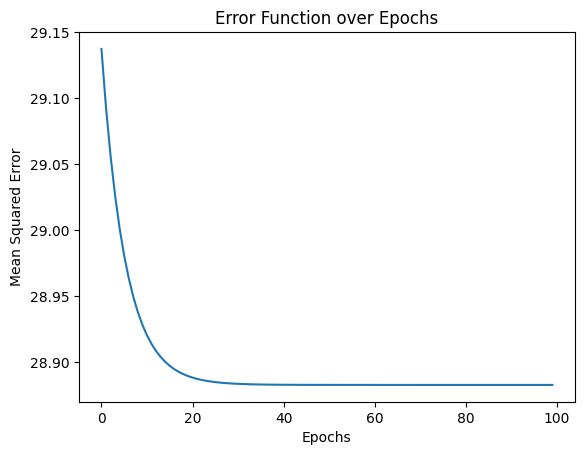

In [40]:
"""
Example usage:
1. Load the dataset.
2. Convert the data into lists of floats.
3. Initialize parameters for the gradient descent algorithm.
4. Perform gradient descent to optimize the parameters.
5. Print the final parameters and plot the error function over epochs.
"""
data_frame = pd.read_csv('Data/student_scores.csv')
X = data_frame['Hours'].to_list()
y = data_frame['Scores'].to_list()
X = [float(i) for i in X]
y = [float(i) for i in y]

m = 5.0  # Initial slope parameter
c = 3.0  # Initial intercept parameter
learning_rate = 0.01  # Learning rate for the gradient descent
epochs = 100  # Number of epochs to run the gradient descent

# Perform gradient descent to optimize m and c
m, c, errors = gradient_descent(X, y, m, c, learning_rate, epochs)

# Print the final optimized parameters
print(f"m = {m}, c = {c}")
print(f"Final MSE = {compute_mse(X, y, m, c)}")

# Plot the error function over the epochs
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Error Function over Epochs')
plt.show()

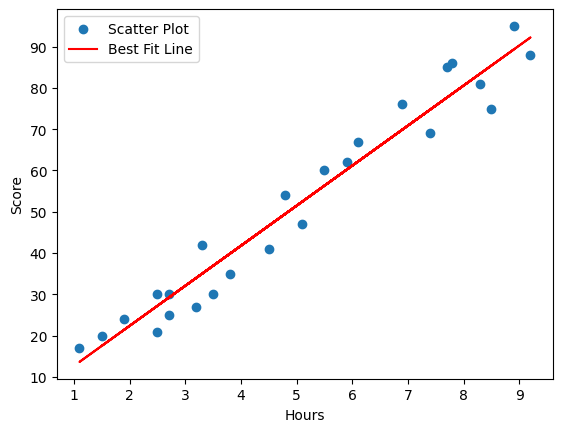

In [38]:
plt.scatter(X,y)
y_pred=[m*x+c for x in X]
plt.plot(X,y_pred,color='red')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend(['Scatter Plot','Best Fit Line'])